In [3]:
#!/usr/bin/env python
# coding: utf-8
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

#parser = argparse.ArgumentParser()
#parser.add_argument('--model', help='Folder that the Saved Model is Located In',
#                    default='exported-models/my_mobilenet_model')
#parser.add_argument('--labels', help='Where the Labelmap is Located',
#                    default='exported-models/my_mobilenet_model/saved_model/label_map.pbtxt')
#parser.add_argument('--image', help='Name of the single image to perform detection on',
#                    default='images/test/L8NYD3VX1ZF6QPUO5H2T.jpg')
#parser.add_argument('--threshold', help='Minimum confidence threshold for displaying detected objects',
#                    default=0.60)
                    
#args = parser.parse_args()
# Enable GPU dynamic memory allocation
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
#IMAGE_PATHS = args.image

# PROVIDE PATH TO MODEL DIRECTORY
#PATH_TO_MODEL_DIR = args.model
PATH_TO_MODEL_DIR = r'C:\Users\amir\Desktop\TensorFlow\workspace\training_demo\exported-models\my_mobilenet_model'
# PROVIDE PATH TO LABEL MAP
#PATH_TO_LABELS = args.labels
PATH_TO_LABELS = r'C:\Users\amir\Desktop\TensorFlow\workspace\training_demo\annotations\label_map.pbtxt'

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))



# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
#MIN_CONF_THRESH = float(args.threshold)
MIN_CONF_THRESH = .25
# LOAD THE MODEL
#IMAGE_PATHS = 'images/test/4.jpg'
image_dir = os.path.join('images/test')


def model(image, MIN_CONF_THRESH=.5):
    print('Loading model...', end='')
    start_time = time.time()
    IMAGE_PATHS = os.path.join(image_dir, image)
    # LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
    detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Done! Took {} seconds'.format(elapsed_time))

    # LOAD LABEL MAP DATA FOR PLOTTING

    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


    #import warnings
    #warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

    print('Running inference for {}... '.format(IMAGE_PATHS), end='')

    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=MIN_CONF_THRESH,
          agnostic_mode=False)

    print('Done')
    # DISPLAYS OUTPUT IMAGE
    #cv2.imshow('Object Detector', image_with_detections)
    # CLOSES WINDOW ONCE KEY IS PRESSED
    #cv2.waitKey(0)
    # CLEANUP
    #cv2.destroyAllWindows()
    image_with_detections = cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_detections)

Loading model...Done! Took 15.21669888496399 seconds
Running inference for images/test\image (1).jpg... Done


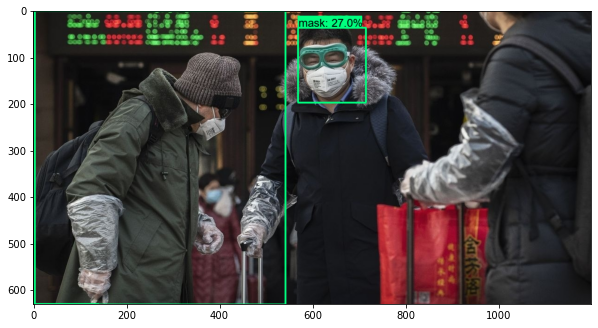

In [10]:
model('image (1).jpg', 0.26)

Loading model...Done! Took 15.219834804534912 seconds
Running inference for images/test\image (2).jpg... Done


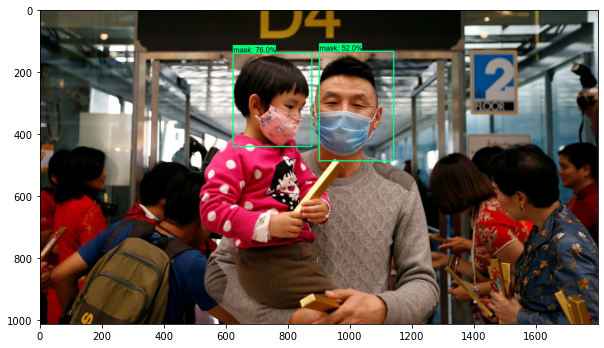

In [11]:
model('image (2).jpg', 0.5)

Loading model...Done! Took 20.56992769241333 seconds
Running inference for images/test\image (3).jpg... Done


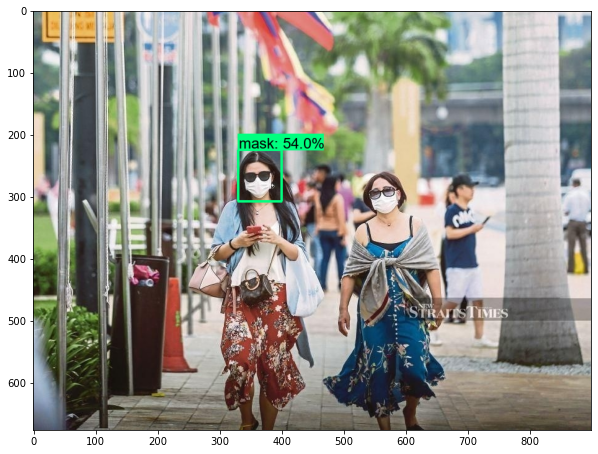

In [12]:
model('image (3).jpg', 0.5)

Loading model...Done! Took 17.85824227333069 seconds
Running inference for images/test\image (4).jpg... Done


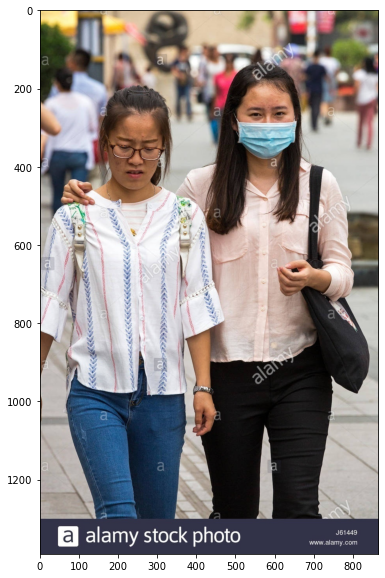

In [15]:
model('image (4).jpg', 0.5)

Loading model...Done! Took 16.495355367660522 seconds
Running inference for images/test\image (5).jpg... Done


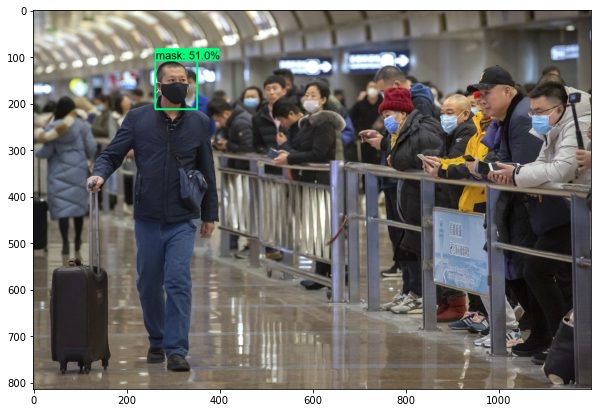

In [16]:
model('image (5).jpg', 0.5)

Loading model...Done! Took 16.702742099761963 seconds
Running inference for images/test\image (6).jpg... Done


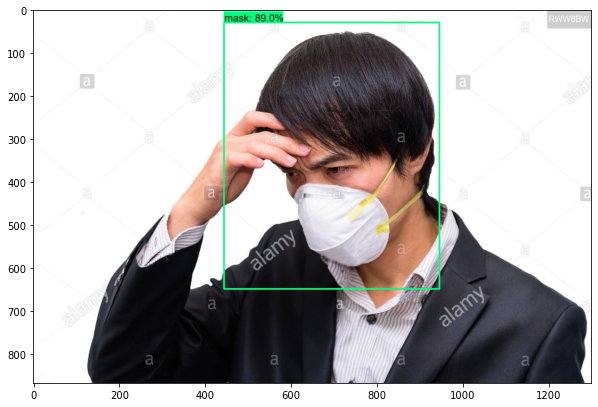

In [17]:
model('image (6).jpg', 0.5)

Loading model...Done! Took 19.486190795898438 seconds
Running inference for images/test\image (7).jpg... Done


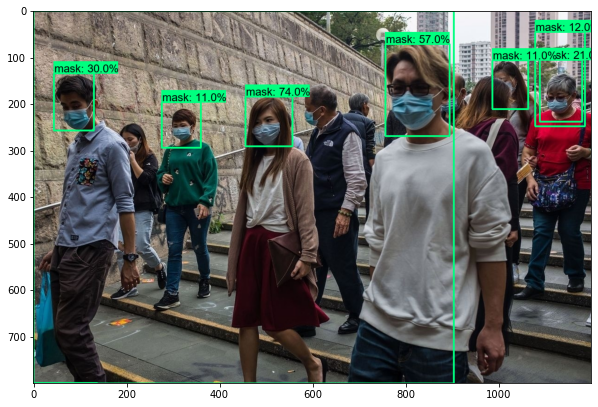

In [21]:
model('image (7).jpg', 0.1)

Loading model...Done! Took 17.059133291244507 seconds
Running inference for images/test\53.jpg... Done


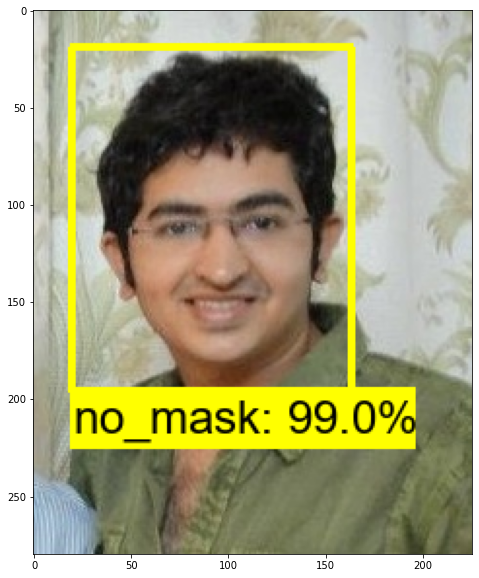

In [24]:
model('53.jpg', 0.6)

Loading model...Done! Took 16.86832594871521 seconds
Running inference for images/test\20.jpg... Done


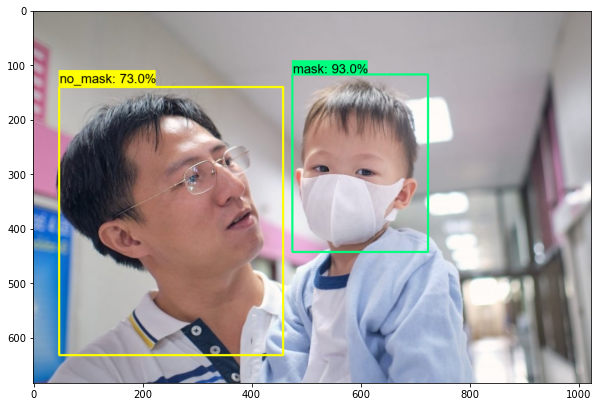

In [25]:
model('20.jpg', 0.6)

Loading model...Done! Took 15.398202657699585 seconds
Running inference for images/test\LCNSR7KOQPMF9THVI14D.jpg... Done


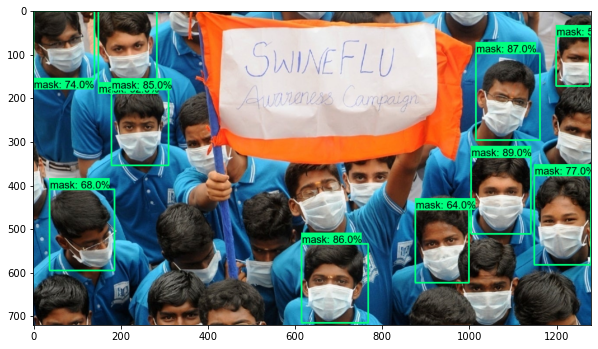

In [27]:
model('LCNSR7KOQPMF9THVI14D.jpg', 0.5)

Loading model...Done! Took 18.27911376953125 seconds
Running inference for images/test\4.jpg... Done


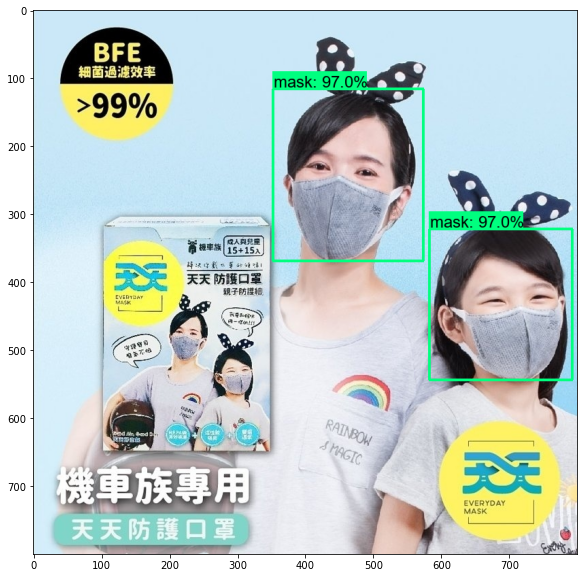

In [28]:
model('4.jpg', 0.5)